In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sfma.api import SFMAModel

In [2]:
df = pd.read_csv("../data/gdp-le.csv")

In [3]:
df = df.loc[~np.isnan(df.gdp.values)]
df = df.loc[~np.isnan(df[["le"]].values)]

# Adding intercept and null value (for zeroes)
df["int"] = 1.
df["null"] = 1e-3

# Log of life expectancy and GDP for modeling
df["log.le"] = np.log(df["le"])
df["log.gdp"] = np.log(df["gdp"])

df.sort_values('gdp', inplace=True)

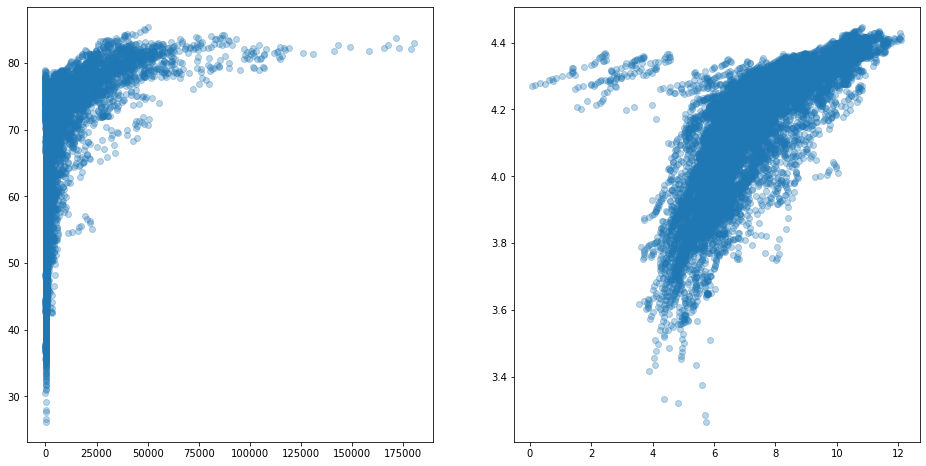

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].scatter(df[["gdp"]], df[["le"]], alpha=0.3)
ax[1].scatter(np.log(df[["gdp"]]), np.log(df[["le"]]), alpha=0.3)

In [17]:
model = SFMAModel(
    df=df,
    col_output='log.le',
    col_se='int',
    col_input='log.gdp',
    concave=True,
    knots_type='domain',
    knots_num=4,
    # include_gamma=True,
    increasing=True,
    r_linear=True,
    pct_trimming=0.05,
    constr_grid_num=100
)
model.fit(step_size=100)

/opt/miniconda3/envs/sfma/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Trimming iteration:  59 / 100 -- error:  9e-0511
Model converged successfully! :)


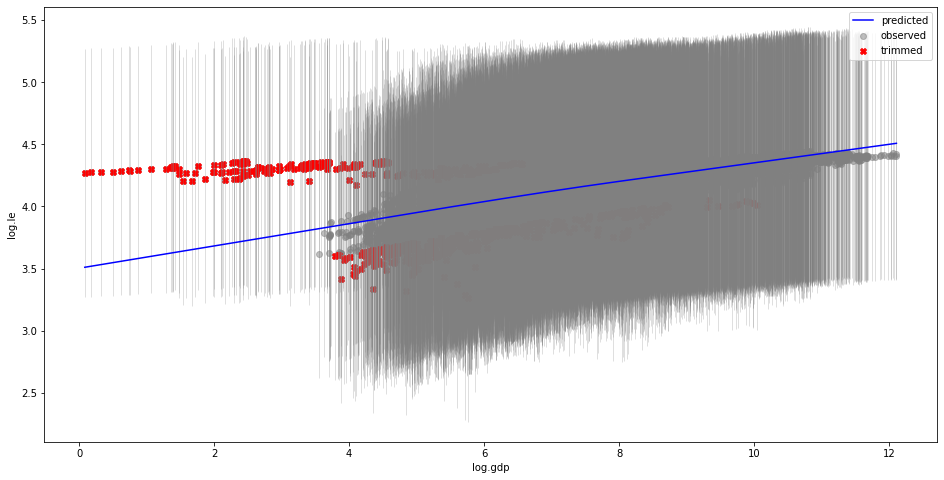

In [18]:
model.plot_frontier(df)